## Support Vector Machines(svm):
* Support Vector Machines (SVM) is a popular supervised machine learning algorithm used for classification and regression tasks. SVMs are particularly effective in solving complex problems where there is a clear margin of separation between classes.

* The basic idea behind SVM is to find an optimal hyperplane that separates the data points of different classes with the maximum margin. The hyperplane is defined as the decision boundary that separates the classes. Data points that are closest to the hyperplane are called support vectors, and they play a crucial role in defining the hyperplane.

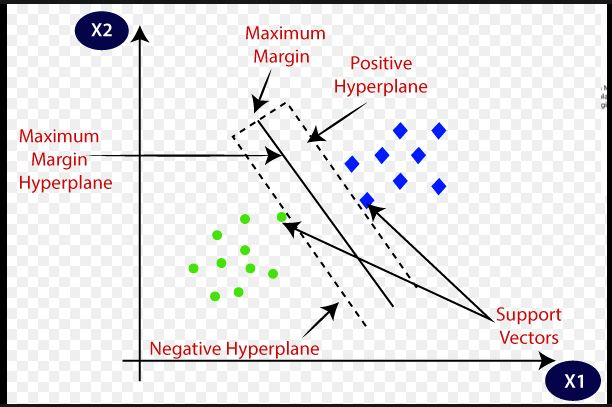

* In the case of linearly separable data, an SVM finds the hyperplane that maximizes the margin between the two classes. This hyperplane is the one that has the maximum distance to the nearest data points of each class. The SVM algorithm aims to find this hyperplane by solving an optimization problem.

* However, in many real-world scenarios, the data is not linearly separable. In such cases, SVMs use a technique called the kernel trick. The kernel trick maps the original data into a higher-dimensional space, where it might become linearly separable. The most commonly used kernels are the linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel.


 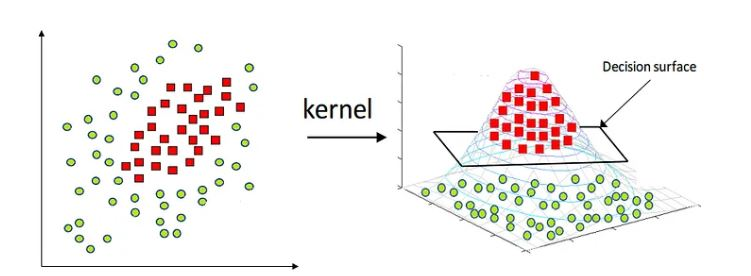

The most commonly used kernel functions in SVMs are:

1. Linear Kernel: The linear kernel is the simplest kernel and is used for linearly separable data. It computes the dot product between the feature vectors of the input data points.

2. Polynomial Kernel: The polynomial kernel function computes the similarity between data points in a higher-dimensional space using a polynomial function. It introduces additional polynomial terms and can capture nonlinear relationships between features.

3. Radial Basis Function (RBF) Kernel: The RBF kernel, also known as the Gaussian kernel, is widely used in SVMs. It measures the similarity between data points based on their radial distance in the feature space. The RBF kernel can capture complex nonlinear relationships and is suitable for a wide range of applications.

4. Sigmoid Kernel: The sigmoid kernel is another kernel function used in SVMs. It calculates the similarity between data points using a hyperbolic tangent function. The sigmoid kernel can handle nonlinear relationships but is less commonly used compared to the other kernels.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data is cleaned

<AxesSubplot:xlabel='Churn', ylabel='count'>

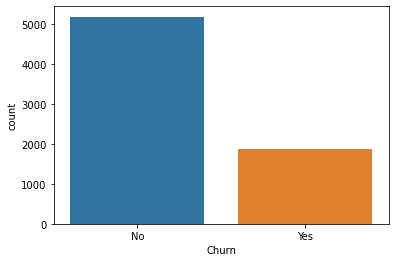

In [7]:
#target column
sns.countplot(x=df.Churn)

Target column is imbalanced

## Encoding

In [8]:
cat_col=df.select_dtypes('object')

In [9]:
le=LabelEncoder()
for i in cat_col.columns:
    df[i]=le.fit_transform(df[i])

## Spliting data

In [10]:
X=df.drop('Churn',axis=1)
Y=df['Churn']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)

## Feature scaling

In [12]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## SVM model building

### SVM parameters:
* C (Cost): C is the regularization parameter that controls the trade-off between achieving a low training error and a low testing error. A smaller C value allows for a wider margin, potentially leading to more training errors but better generalization. On the other hand, a larger C value focuses more on getting the training examples correctly classified, possibly resulting in overfitting.

* Kernel: SVMs can use different kernel functions to transform the input data into a higher-dimensional feature space, where the classes are more separable. Common kernel functions include linear, polynomial, radial basis function (RBF)/Gaussian, and sigmoid. The choice of kernel depends on the data and the problem at hand.

* Gamma: Gamma is a parameter for kernel functions that control the influence of individual training samples. It defines the reach of each sample in the feature space. A low gamma value means the influence is broader, while a high gamma value means the influence is more localized. Gamma is typically used with RBF and polynomial kernels.

In [13]:
model=SVC() #appling default parameters

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.69      0.46      0.55       574

    accuracy                           0.80      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



## Hyperparameter Tuning

In [16]:
parameters = [{'C': [1, 10, 100, 1000], 
               'kernel': ['sigmoid','rbf','poly'], 
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]


grid_search = RandomizedSearchCV(estimator = model,
                           param_distributions = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           verbose=1)

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
